<a href="https://colab.research.google.com/github/Mrrobi/Capstone-Project/blob/main/tang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import numpy as np
import pandas as pd
import pylab as pl
from scipy import interp
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
s = pd.read_csv("/content/drive/My Drive/capstone/Dataset/Taz/count.txt", delimiter='\t')

In [ ]:
print(s)

                     gene  ...  Runx123_GFP.P1.D12
0      ENSDARG00000104632  ...                   0
1      ENSDARG00000100660  ...                   0
2      ENSDARG00000100422  ...                   0
3      ENSDARG00000102128  ...                   0
4      ENSDARG00000103095  ...                 209
...                   ...  ...                 ...
21871  ENSDARG00000101185  ...                   0
21872  ENSDARG00000102248  ...                   0
21873  ENSDARG00000102790  ...                   0
21874  ENSDARG00000100589  ...                   0
21875  ENSDARG00000099551  ...                   0

[21876 rows x 247 columns]


In [ ]:
z=s.columns.tolist()
z.pop(0)


'gene'

In [ ]:
df=s.T

In [ ]:
print(df)

                                 0      ...               21875
gene                ENSDARG00000104632  ...  ENSDARG00000099551
cd41_GFPlow.P3.A01                   0  ...                   0
cd41_GFPlow.P3.A02                   0  ...                   0
cd41_GFPlow.P3.A03                   0  ...                   0
cd41_GFPlow.P3.A04                   0  ...                   0
...                                ...  ...                 ...
Runx123_GFP.P1.D07                   0  ...                   0
Runx123_GFP.P1.D09                   0  ...                   0
Runx123_GFP.P1.D10                   0  ...                   0
Runx123_GFP.P1.D11                   0  ...                   0
Runx123_GFP.P1.D12                   0  ...                   0

[247 rows x 21876 columns]


In [ ]:
df.shape

(247, 21876)

In [ ]:
co=[]

In [ ]:
for x in z:
  c = x.split(".")
  co.append(c[0])



In [ ]:
items=[]

In [ ]:
for x in range (len(co)):
  if(co[x] in items):
    co[x]=items.index(co[x])
  else:
    items.append(co[x])
    co[x]=items.index(co[x])


  

In [ ]:
print(items)

['cd41_GFPlow', 'lck_GFP', 'lck_GFP_rag1', 'mpx_EGFP', 'rag2_GFP', 'Runx123_GFP']


In [ ]:
print(co)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
y=np.asarray(co)


In [ ]:
x = np.asarray(df.iloc[1:,])
x.shape


(246, 21876)

In [ ]:
import keras
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))

multiclass


In [ ]:
seed = 40
np.random.seed(seed)

kf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

[[8 0 0 1 0 0]
 [0 8 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 9 0 0]
 [0 1 0 0 8 1]
 [2 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       0.90      1.00      0.95         9
           4       1.00      0.80      0.89        10
           5       0.86      0.75      0.80         8

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



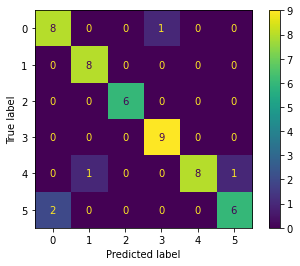

[[ 7  0  1  1  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  1  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 2  0  0  0  0  5]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       1.00      1.00      1.00         7
           2       0.86      0.86      0.86         7
           3       0.90      1.00      0.95         9
           4       0.91      1.00      0.95        10
           5       1.00      0.71      0.83         7

    accuracy                           0.90        49
   macro avg       0.91      0.89      0.89        49
weighted avg       0.90      0.90      0.90        49



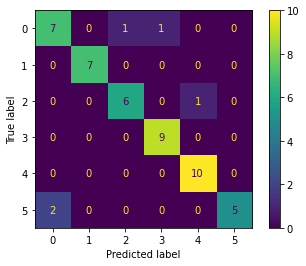

[[ 8  0  0  1  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1  5  0  0  0]
 [ 0  0  0 10  0  0]
 [ 1  0  0  0  8  0]
 [ 4  0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.88      1.00      0.93         7
           2       1.00      0.83      0.91         6
           3       0.91      1.00      0.95        10
           4       1.00      0.89      0.94         9
           5       1.00      0.50      0.67         8

    accuracy                           0.86        49
   macro avg       0.90      0.85      0.85        49
weighted avg       0.89      0.86      0.85        49



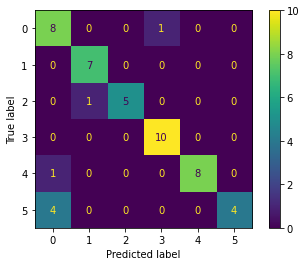

[[ 3  0  1  2  0  2]
 [ 0  7  0  0  1  0]
 [ 1  0  5  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       1.00      0.88      0.93         8
           2       0.83      0.83      0.83         6
           3       0.83      1.00      0.91        10
           4       0.90      1.00      0.95         9
           5       0.80      1.00      0.89         8

    accuracy                           0.86        49
   macro avg       0.85      0.85      0.84        49
weighted avg       0.85      0.86      0.84        49



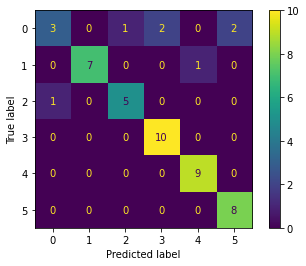

[[5 1 0 0 1 1]
 [1 7 0 0 0 0]
 [0 0 5 0 1 0]
 [0 0 0 9 0 0]
 [0 1 0 0 9 0]
 [1 1 0 0 0 6]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.70      0.88      0.78         8
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         9
           4       0.82      0.90      0.86        10
           5       0.86      0.75      0.80         8

    accuracy                           0.84        49
   macro avg       0.85      0.83      0.84        49
weighted avg       0.84      0.84      0.84        49



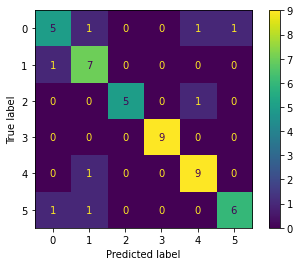

Test:
ACCURACY:86.9796
RECALL: 86.5529
Precision: 86.9796
Balanced: 86.5529


In [ ]:
#Random Forest

clf = RandomForestClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred, average='macro'))
  pre_test.append(precision_score(y_test, y_test_pred, average='micro'))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))
  from sklearn.metrics import classification_report, confusion_matrix
  print(confusion_matrix(y_test, y_test_pred))
  print(classification_report(y_test, y_test_pred))
  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
  plt.show()  # doctest: +SKIP

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))
# pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# mean_tpr /= 5
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# pl.plot(mean_fpr, mean_tpr, 'k--',
#         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

# pl.xlim([-0.05, 1.05])
# pl.ylim([-0.05, 1.05])
# pl.xlabel('False Positive Rate')
# pl.ylabel('True Positive Rate')
# pl.title('Receiver operating characteristic example')
# pl.legend(loc="lower right")
# pl.show()

In [ ]:
#Adaboost 

clf = AdaBoostClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  # fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  # mean_tpr += np.interp(mean_fpr, fpr, tpr)
  # mean_tpr[0] = 0.0
  # roc_auc = auc(fpr, tpr)
  # pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  # i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred, average='macro'))
  pre_test.append(precision_score(y_test, y_test_pred, average='micro'))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

# pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# mean_tpr /= 5
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# pl.plot(mean_fpr, mean_tpr, 'k--',
#         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

# pl.xlim([-0.05, 1.05])
# pl.ylim([-0.05, 1.05])
# pl.xlabel('False Positive Rate')
# pl.ylabel('True Positive Rate')
# pl.title('Receiver operating characteristic example')
# pl.legend(loc="lower right")
# pl.show()

Test:
ACCURACY:64.2612
RECALL: 62.9061
Precision: 64.2612
Balanced: 62.9061


In [ ]:
#SVC

clf = SVC()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  clf.fit(x_train, y_train)
  # fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  # mean_tpr += np.interp(mean_fpr, fpr, tpr)
  # mean_tpr[0] = 0.0
  # roc_auc = auc(fpr, tpr)
  # pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  # i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred, average='macro'))
  pre_test.append(precision_score(y_test, y_test_pred, average='micro'))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

# pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# #figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# mean_tpr /= 5
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# pl.plot(mean_fpr, mean_tpr, 'k--',
#         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

# pl.xlim([-0.05, 1.05])
# pl.ylim([-0.05, 1.05])
# pl.xlabel('False Positive Rate')
# pl.ylabel('True Positive Rate')
# pl.title('Receiver operating characteristic example')
# pl.legend(loc="lower right")
# pl.show()

Test:
ACCURACY:73.9918
RECALL: 72.295
Precision: 73.9918
Balanced: 72.295
